# olist unavailable order data analysis



---

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from datetime import datetime as dt
from collections import Counter

# 1. 데이터 준비

## df_orders : 주문 데이터

In [2]:
df_orders = pd.read_csv('./data/olist_orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
df_orders.shape

(99441, 8)

In [3]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
df_orders.describe().transpose()

,count,unique,top,freq
order_id,99441,99441,2f1722b42c42fe13229264df753dfbfd,1
customer_id,99441,99441,1e8aa3c3725bb28d332cf08aca2e5e1b,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2016-10-27 17:32:07,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


In [60]:
print('min_order_purchase_timestamp: {} \nmax_order_purchase_timestamp: {}'
     .format(df_orders.order_purchase_timestamp.min(),
             df_orders.order_purchase_timestamp.max()))

min_order_purchase_timestamp: 2016-09-04 21:15:19 
max_order_purchase_timestamp: 2018-10-17 17:30:18


## df_order_items : 주문 상세 데이터

In [6]:
df_order_items = pd.read_csv('./data/olist_order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
df_order_items.shape

(112650, 7)

In [14]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [51]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


## df_customers : 고객 데이터

In [87]:
df_customers = pd.read_csv('./data/olist_customers_dataset.csv')
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [88]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id와 customer_unique_id가 있다. 고유한 고객 ID는 customer_unique_id로 customer_id는 order_id에 따라 달라진다.  
또한 customer_unique_id당 customer_id의 수는 재주문 건수이다.

In [94]:
print('numbers of customer_id: {} \nnumbers of customer_unique_id: {}'
     .format(df_customers.customer_id.nunique(),
             df_customers.customer_unique_id.nunique()))

numbers of customer_id: 99441 
numbers of customer_unique_id: 96096


In [97]:
df_customers.groupby('customer_unique_id')['customer_id'].count().sort_values(ascending=False)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
5657dfebff5868c4dc7e8355fea865c4     1
5657596addb4d7b07b32cd330614bdf8     1
5656eb169546146caeab56c3ffc3d268     1
5656a8fabc8629ff96b2bc14f8c09a27     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Name: customer_id, Length: 96096, dtype: int64

In [98]:
df_customers[df_customers.customer_unique_id == '8d50f5eadf50201ccdcedfb9e2ac8455']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14186,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
15321,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
16654,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
36122,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
38073,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
40141,dfb941d6f7b02f57a44c3b7c3fefb44b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
48614,65f9db9dd07a4e79b625effa4c868fcb,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
52574,1c62b48fb34ee043310dcb233caabd2e,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
58707,a682769c4bc10fc6ef2101337a6c83c9,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
67996,6289b75219d757a56c0cce8d9e427900,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP


## df_order_payments : 주문별 지불내용 데이터

In [163]:
df_order_payments = pd.read_csv('./data/olist_order_payments_dataset.csv')
df_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [91]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


## df_geolocation : 지리 데이터

In [92]:
df_geolocation = pd.read_csv('./data/olist_geolocation_dataset.csv')
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


geolocation_state = 브라질의 26개 주 + 1개의 연방구  

참고: https://ko.wikipedia.org/wiki/%EB%B8%8C%EB%9D%BC%EC%A7%88%EC%9D%98_%EC%A3%BC

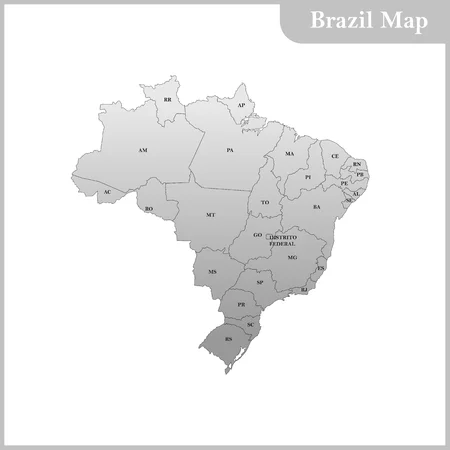

# 2. 문제 상황

주문(df_orders) 테이블에서 order_approved_at(주문 승인일) 160건, order_delivered_carrier_date(배송중) 1783건, order_delivered_customer_date(배송완료) 2965건이 Null값으로 확인된다. 이는 order_status(주문 상태)에 기인한 것인데, 그 이유에 대해 알아보고자 한다.

In [62]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


주문 상품 테이블의 order_id 종류는 98,666개이며, 이는 모두 주문 테이블에 포함된 order_id이다.

In [65]:
df_order_items.order_id.nunique()

98666

In [67]:
df_order_items['order_id'].isin(df_orders['order_id']).value_counts()

True    112650
Name: order_id, dtype: int64

# 3. 문제 정의 및 가설 설정

## 문제

전체 99,441 중 주문 상세 정보가 없는 775건의 주문은 전체의 0.78%이다.
해당 775건의 주문 상태에는 unavailable과 canceled가 많은데, 취소 주문 건을 제외한 unavailable의 원인 파악이 필요하다.

<AxesSubplot:>

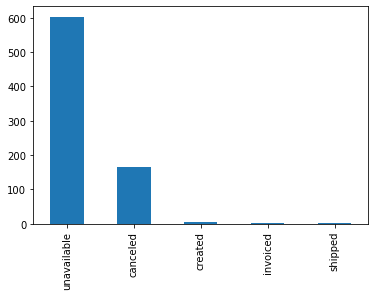

In [71]:
df_orders[~df_orders['order_id'].isin(df_order_items['order_id'])]['order_status'].value_counts().plot(kind='bar')

## 가설

- 1. 주문 날짜가 데이터 마지막 기간(가장 최신 날짜)일 것이다.
- 2. 주문 금액대가 매우 크거나 매우 작은 건수일 것이다.
- 3. 주문 고객의 지역이 최대 도시인 상파울로가 아닌 외곽 지역일 것이다.

# 4. EDA 및 가설검증

unavailable 상태의 주문건들은 총 609건으로, 구매(order_purchase_timestamp) 후 승인(order_approved_at)이 되었지만 배송이 시작되지 않았다.

In [127]:
df_order_unavailable = df_orders[df_orders.order_status == 'unavailable']
df_order_unavailable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 266 to 99415
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       609 non-null    object
 1   customer_id                    609 non-null    object
 2   order_status                   609 non-null    object
 3   order_purchase_timestamp       609 non-null    object
 4   order_approved_at              609 non-null    object
 5   order_delivered_carrier_date   0 non-null      object
 6   order_delivered_customer_date  0 non-null      object
 7   order_estimated_delivery_date  609 non-null    object
dtypes: object(8)
memory usage: 42.8+ KB


### 가설 1 검증.
    => unavailable 상태의 주문은 2016년 10월부터 2019년 8월에 주문된 것까지 주문 날짜가 다양하다.

<AxesSubplot:>

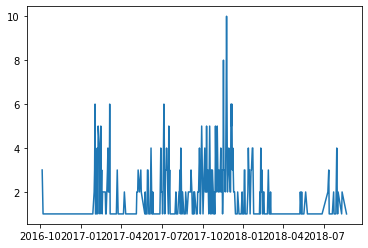

In [110]:
pd.to_datetime(df_order_unavailable.order_purchase_timestamp).dt.date.value_counts().plot(kind='line')

### 가설 2 검증.
    => unavailable 상태인 주문의 지불금액은 평균 203헤알(약 49,300원), 중앙값 343헤알(약 83150원)이고 최댓값이 3782헤알(약 916,800원)인 반면 3분위 값(75%)이 179헤알(약 43,400원)이므로 주문 금액이 크지 않으며, 전체 주문 데이터의 지불금액 분포와도 크게 차이가 없다.

In [145]:
payment_value_list = []
for id in list(df_order_unavailable.order_id):
    pay_value = df_order_payments[df_order_payments.order_id == id]['payment_value'].iloc[0]
    payment_value_list.append(pay_value)

In [171]:
payment_value_unavailable = pd.DataFrame(payment_value_list)
payment_value_unavailable.columns = ['payment_value']
payment_value_unavailable.describe()

,payment_value
count,609.000000
mean,203.426158
std,343.384932
min,0.070000
25%,61.190000
50%,102.030000
75%,179.350000
max,3782.190000


### 가설 3 검증.
    => 브라질 최대 도시인 상파울루(SP)와 인구밀도가 높은 미나스제라이스주(MG), 리우데자네이루주(RJ)에서 unavailable 상태인 주문 건수가 가장 많았다. 전체 고객의 69%가 위 세 주에서 거주한다는 점을 미루어보아 주문 고객의 지역(customer_state)과 unavailable 상태인 것이 큰 상관관계가 있다기보다 주문량이 많은 만큼 unavailable 건수가 많이 발생한 것으로 볼 수 있다.

In [174]:
## customer_state
customer_state_list = []
for id in list(df_order_unavailable.customer_id):
    state = df_customers[df_customers.customer_id == id]['customer_state'].iloc[0]
    customer_state_list.append(state)
customer_state_unavailable = pd.DataFrame(customer_state_list)
customer_state_unavailable.columns = ['customer_state']
customer_state_unavailable.value_counts()

customer_state
SP                292
MG                 75
RJ                 68
PR                 40
RS                 24
BA                 20
SC                 18
DF                 12
GO                  9
MA                  7
CE                  6
ES                  6
MS                  5
RO                  4
PE                  4
SE                  4
RN                  3
PB                  3
MT                  3
PA                  2
AL                  1
PI                  1
AM                  1
TO                  1
dtype: int64

In [178]:
## customer_city
customer_city_list = []
for id in list(df_order_unavailable.customer_id):
    city = df_customers[df_customers.customer_id == id]['customer_city'].iloc[0]
    customer_city_list.append(city)
customer_city_unavailable = pd.DataFrame(customer_city_list)
customer_city_unavailable.columns = ['customer_city']
customer_city_unavailable.value_counts().head(20)

customer_city        
sao paulo                109
rio de janeiro            33
belo horizonte            19
brasilia                  12
campinas                  11
curitiba                   9
guarulhos                  9
sao bernardo do campo      9
salvador                   7
taboao da serra            6
sorocaba                   5
sao luis                   5
barueri                    4
campo grande               4
sao jose dos campos        4
santos                     4
volta redonda              4
goiania                    4
praia grande               4
aracaju                    4
dtype: int64

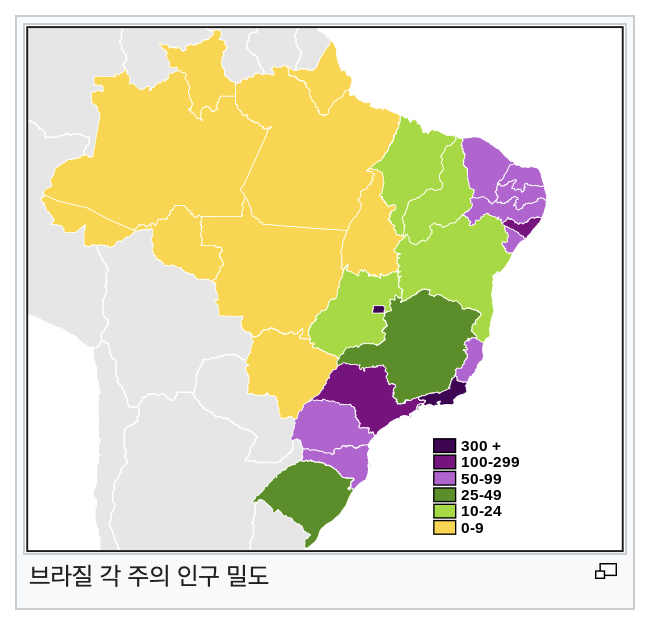

전체 고객의 거주지역 분포

In [183]:
df_customers.groupby('customer_state')['customer_unique_id'].count().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_unique_id, dtype: int64

# 5. 결론

전체 99,441 건의 주문에 대해 상세 정보가 없는 주문이 775건이 존재했고, 이는 전체 주문 중 0.78%에 해당한다. 775건의 주문 중 609건의 주문이 구매(order_purchase_timestamp) 후 승인(order_approved_at)이 되었지만 배송이 시작되지 않은 채 unavailable 상태로 남은 것을 문제로 정의했다.

unavailable 상태인 주문은 전체 데이터 기간에 고르게 분포했으며, 주문금액은 특이점 없이 전체 주문 데이터의 주문금액 분포와 비슷했다.
또한 unavailable 상태의 주문이 많이 발생한 상위 3개의 주는 SP, MG, RJ로 해당 주문상태 데이터의 71%를 차지했다. 하지만 위 세 개의 주는 브라질에서 인구밀도가 높은 상위 3개의 주일 뿐만 아니라 olist 전체 고객의 69%의 거주지역이므로 주문량에 비례하여 unavailable 상태의 주문 건수도 많은 것으로 보인다.  

unavailable 상태인 주문은 고객이 구매 후 unavailable 상태로 남아 주문 상세 데이터가 없다는 점에서 분석에 한계가 있었다. 해당 주문의 상품 카테고리 또는 판매자에 대한 분석이 필요하다. 나아가 고객이 상품을 구매하는 과정에서 unavailable 주문의 경험은 부정적인 영향을 미칠 것으로 보인다. 따라서 unavailable 주문 건의 고객 이탈률을 확인하고 고객 세그먼트에 따라 특별 프로모션을 주는 등의 마케팅 액션이 필요하다.
